
FINOVA ML TASK(INTERMIDIATE)

LINEAR REGRESSION

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('housing.csv')


X = df[['RM', 'LSTAT', 'PTRATIO']]  
y = df['MEDV'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Mean Squared Error (MSE): 6789025559.265897
R-squared (R²): 0.6910934003098508
Coefficients: [ 87322.20361861 -10620.63731522 -19324.4102965 ]
Intercept: 408027.65416807705


In [28]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [29]:
def predict_home_price(rm, lstat, ptratio):
    # Create a DataFrame with the input values (features)
    input_data = pd.DataFrame([[rm, lstat, ptratio]], columns=['RM', 'LSTAT', 'PTRATIO'])
    
    # Predict the MEDV (home price) using the trained model
    predicted_price = model.predict(input_data)
    
    # Return the predicted home price
    return predicted_price[0]

In [30]:
predict_home_price(7,5,14.5)

685975.9436230038

In [31]:
# the predicted value of house in thousands dollars is 685975.9436230038 for rm=7, lstat=5, ptratio=14.5)

LOGISTIC REGRESSION

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [33]:
df2 = pd.read_csv('iris.csv')

In [34]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
X = df2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df2['Species']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)



print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


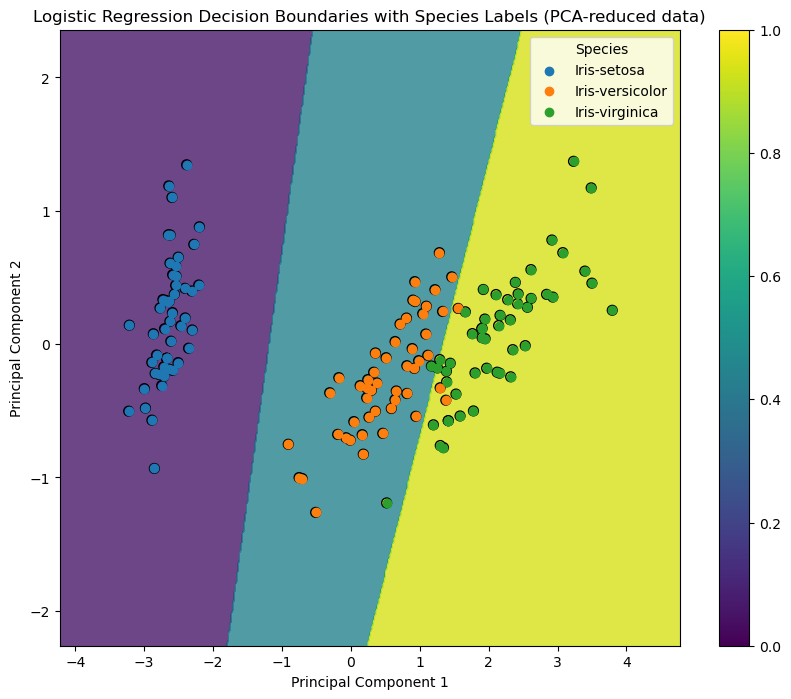

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train the model using the PCA-transformed features
model.fit(X_pca, y_encoded)

# Create a mesh grid for plotting
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions across the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, edgecolors='k', marker='o', s=50)

# Annotate the points with species labels
for i, txt in enumerate(label_encoder.classes_):
    species_points = X_pca[y_encoded == i]
    plt.scatter(species_points[:, 0], species_points[:, 1], label=txt)

# Plot the legend
plt.legend(title='Species')

# Title and labels
plt.title("Logistic Regression Decision Boundaries with Species Labels (PCA-reduced data)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the color bar and plot
plt.colorbar()
plt.show()

In [38]:
# boundry is drawn in the plane that seperates different species .